# Tutorial 4: Using the QASM simulator

In this tutorial, we apply Entanglement Forged VQE to compute the energy of a $H_2$ molecule using the QASM simulator. 

**What's new here?**
- Using the QASM simulator
- Specifying a value for `copysample_job_size` parameter


For comparison, you may wish to review how the same problem was solved using the Statevector Simulator in Tutorial 1.



### Import the relevant modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import pyplot as plt
import numpy as np

from qiskit.circuit.library import TwoLocal
from qiskit_nature.drivers import PySCFDriver, Molecule
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit_nature.converters.second_quantization import QubitConverter

import sys
sys.path.append('../../')
from entanglement_forging import EntanglementForgedGroundStateSolver
from entanglement_forging import EntanglementForgedConfig

### Define the problem and specify the ansatz and bitstrings as we did in Tutorial 1

In [3]:
# We start by setting up the chemical problem.

molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                              ['H', [0., 0., 0.735]]],
                     charge=0, multiplicity=1)
driver = PySCFDriver(molecule = molecule, basis='sto3g')
problem = ElectronicStructureProblem(driver)

converter = QubitConverter(JordanWignerMapper())

# Prepare the bitstrings and the ansatz

bitstrings = [[1,0],[0,1]]

ansatz = TwoLocal(2, [], 'cry', [[0,1],[1,0]], reps=1)

### Run the Forged VQE algorithm on the QASM simulator

For the QASM simulator, we will evaluate each circuit multiple times to build up statistics. To improve performance, we can sample the circuits according to their relative significance (Schmidt coefficients). This is invoked by specifying a value for copysample_job_size. 

In [4]:
from qiskit import Aer

backend = Aer.get_backend('qasm_simulator')
config = EntanglementForgedConfig(backend = backend, copysample_job_size = 100)

calc = EntanglementForgedGroundStateSolver(converter, ansatz, bitstrings, config)
res = calc.solve(problem)

res

Ground state energy (Hartree): -1.1369232370683675
Schmidt values: [-0.99385311  0.11070676]
Optimizer parameters: [-25.13546688  18.63348097]

Energies (from only one paramset in each iteration):


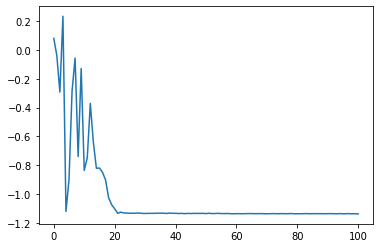

Schmidts (from only one paramset in each iteration):


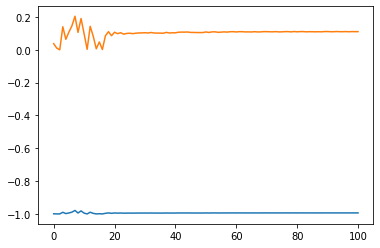

Parameters (from only one paramset in each iteration):


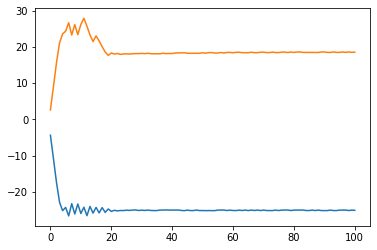

In [5]:
print('Energies (from only one paramset in each iteration):')
plt.plot([e[0] for e in res.get_energies_history()])
plt.show()
print('Schmidts (from only one paramset in each iteration):')
plt.plot([s[0] for s in res.get_schmidts_history()])
plt.show()
print('Parameters (from only one paramset in each iteration):')
plt.plot([p[0] for p in res.get_parameters_history()])
plt.show()

In [6]:
res

Ground state energy (Hartree): -1.1369232370683675
Schmidt values: [-0.99385311  0.11070676]
Optimizer parameters: [-25.13546688  18.63348097]